# EfficientNet Implementation   - EfficientNet- B0

## Training a Custom  Model from scratch

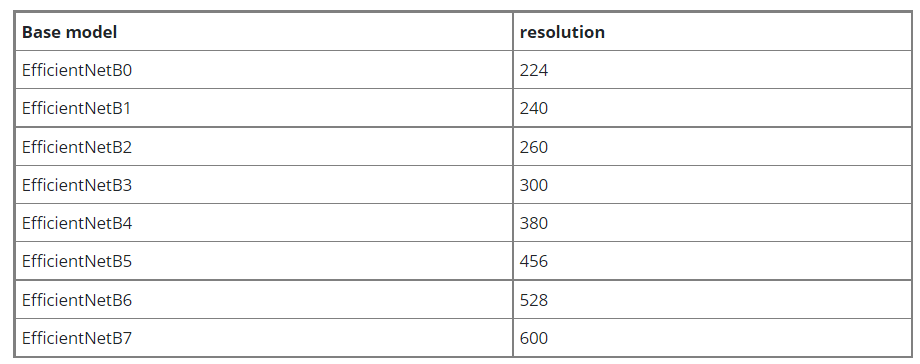

# Data Pre Processing

In [1]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir(r'D:\Research\FInal_Processed_For_ModelRun')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))


['Black Rot', 'Downy Mildew', 'ESCA', 'Healthy']
Types of classes labels found:  4


In [2]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir(r'D:\Research\FInal_Processed_For_ModelRun' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [3]:

# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

      Labels                                              image
0  Black Rot  dataset_path/Black Rot/CENTER_0001_BURST202410...
1  Black Rot  dataset_path/Black Rot/CENTER_0001_BURST202410...
2  Black Rot  dataset_path/Black Rot/CENTER_0001_BURST202410...
3  Black Rot  dataset_path/Black Rot/CENTER_0001_BURST202410...
4  Black Rot  dataset_path/Black Rot/CENTER_0001_BURST202410...
       Labels                                              image
3741  Healthy  dataset_path/Healthy/IMG_20241102_163457_aug2.jpg
3742  Healthy       dataset_path/Healthy/IMG_20241102_163502.jpg
3743  Healthy       dataset_path/Healthy/IMG_20241102_163620.jpg
3744  Healthy  dataset_path/Healthy/IMG_20241102_163715_aug1.jpg
3745  Healthy  dataset_path/Healthy/IMG_20241102_163715_aug2.jpg


In [4]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  3746
Labels
Black Rot       950
Downy Mildew    950
ESCA            950
Healthy         896
Name: count, dtype: int64


In [5]:
import os
import cv2

# ✅ Use the full dataset base path
path = r'D:\Research\FInal_Processed_For_ModelRun'
dataset_path = os.listdir(path)

im_size = 224
images = []
labels = []

for i in dataset_path:
    data_path = os.path.join(path, i)  # ✅ Join paths safely

    # Check if it’s a folder
    if not os.path.isdir(data_path):
        continue

    filenames = os.listdir(data_path)
    
    for f in filenames:
        img_path = os.path.join(data_path, f)
        img = cv2.imread(img_path)
        
        # Check if image loaded successfully
        if img is None:
            print(f"⚠️ Could not read {img_path}")
            continue
        
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

print("✅ Total images loaded:", len(images))
print("✅ Total labels collected:", len(labels))


✅ Total images loaded: 3746
✅ Total labels collected: 3746


In [6]:

#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(3746, 224, 224, 3)

In [7]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['Black Rot' 'Black Rot' 'Black Rot' ... 'Healthy' 'Healthy' 'Healthy']
[0 0 0 ... 3 3 3]


In [8]:

y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5 stored elements and shape (5, 4)>
  Coords	Values
  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3711 stored elements and shape (3711, 4)>
  Coords	Values
  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (3686, 3)	1.0
  (3687, 3)	1.0
  (3688, 3)	1.0
  (3689, 3)	1.0
  (3690, 3)	1.0
  (3691, 3)	1.0
  (3692, 3)	1.0
  (3693, 3)	1.0
  (3694, 3)	1.0
  (3695, 3)	1.0
  (3696, 3)	1.0
  (3697, 3)	1.0
  (3698, 3)	1.0
  (3699, 3)	1.0
  (3700, 3)	1.0
  (3701, 3)	1.0
  (3702, 3)	1.0
  (3703, 3)	1.0
  (3704, 3)	1.0
  (3705, 3)	1.0
  (3706, 3)	1.0
  (3707, 3)	1.0
  (

In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(3558, 224, 224, 3)
(3558, 4)
(188, 224, 224, 3)
(188, 4)



# EfficientNet Implementation :



Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, 4)                 4054695   
 )                                                               
                                                                 
Total params: 4054695 (15.47 MB)
Trainable params: 4012672 (15.31 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________
train_x shape: (3558, 224, 224, 3)
train_y shape: (3558, 4)
train_y type: <class 'numpy.ndarray'>
⚠ train_y appears to be one-hot encoded with 4 classes
Converting from one-hot to class indices...
✓ Converted to class indices
train_y shape after conversion: (3558,)
train_y unique values: [0 1 2 3]
train_y min: 0, max: 3
Number of unique classe

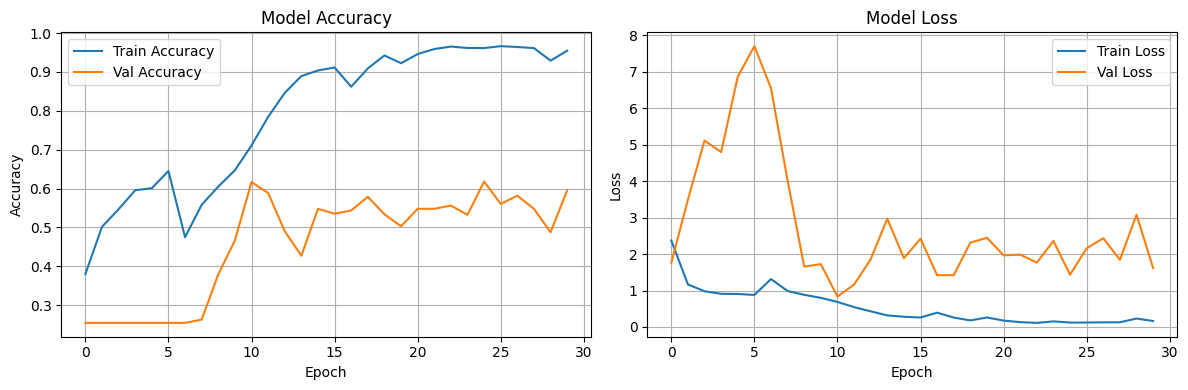


✓ Training complete!


In [14]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
import numpy as np

# ---------------------------
# Model Configuration
# ---------------------------
NUM_CLASSES = 4  # CHANGED FROM 3 TO 4 - Your data has 4 classes!
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# Using model without transfer learning
outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer="adam", 
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# ---------------------------
# Fix train_y (convert from sparse matrix to numpy array)
# ---------------------------
print(f"train_x shape: {train_x.shape}")
print(f"train_y shape: {train_y.shape}")
print(f"train_y type: {type(train_y)}")

# Convert sparse matrix to dense numpy array
if hasattr(train_y, 'toarray'):
    # It's a sparse matrix, convert to dense
    train_y = train_y.toarray()
    print(f"✓ Converted sparse matrix to dense array")
    print(f"train_y shape after conversion: {train_y.shape}")

# Check if train_y is one-hot encoded
if len(train_y.shape) > 1 and train_y.shape[1] > 1:
    print(f"⚠ train_y appears to be one-hot encoded with {train_y.shape[1]} classes")
    print(f"Converting from one-hot to class indices...")
    train_y = np.argmax(train_y, axis=1)
    print(f"✓ Converted to class indices")
    print(f"train_y shape after conversion: {train_y.shape}")
    
    # Update NUM_CLASSES if there's a mismatch
    actual_num_classes = len(np.unique(train_y))
    if actual_num_classes != NUM_CLASSES:
        print(f"⚠ WARNING: NUM_CLASSES was set to {NUM_CLASSES}, but data has {actual_num_classes} classes")
        print(f"Please update NUM_CLASSES = {actual_num_classes} and rebuild the model!")
        
# If train_y is 2D with shape (n, 1), flatten it
elif len(train_y.shape) > 1 and train_y.shape[1] == 1:
    train_y = train_y.flatten()
    print(f"train_y shape after flatten: {train_y.shape}")

# Match the number of samples if there's a mismatch
if train_y.shape[0] != train_x.shape[0]:
    print(f"WARNING: Mismatch! train_y has {train_y.shape[0]} samples but train_x has {train_x.shape[0]}")
    print(f"Trimming train_y to match train_x length...")
    train_y = train_y[:train_x.shape[0]]
    print(f"train_y shape after trim: {train_y.shape}")

# Verify labels are in correct range
print(f"train_y unique values: {np.unique(train_y)}")
print(f"train_y min: {train_y.min()}, max: {train_y.max()}")
print(f"Number of unique classes in data: {len(np.unique(train_y))}")

# Check if NUM_CLASSES matches the data
actual_num_classes = len(np.unique(train_y))
if train_y.max() >= NUM_CLASSES:
    raise ValueError(
        f"Model expects {NUM_CLASSES} classes, but labels go up to {int(train_y.max())}. "
        f"Set NUM_CLASSES = {actual_num_classes} and rebuild the model!"
    )

# ---------------------------
# Train the model
# ---------------------------
print("\nStarting training...")
hist = model.fit(
    train_x, 
    train_y, 
    epochs=30, 
    verbose=1, 
    batch_size=32,
    validation_split=0.2  # Use 20% of training data for validation
)

# ---------------------------
# Plot training history
# ---------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Train Accuracy')
if 'val_accuracy' in hist.history:
    plt.plot(hist.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Train Loss')
if 'val_loss' in hist.history:
    plt.plot(hist.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n✓ Training complete!")

In [33]:
# Complete accuracy summary
print("="*60)
print("TRAINING SUMMARY")
print("="*60)
print(f"Final Training Accuracy:   {hist.history['accuracy'][-1]*100:.2f}%")
print(f"Final Validation Accuracy: {hist.history['val_accuracy'][-1]*100:.2f}%")
print(f"Best Training Accuracy:    {max(hist.history['accuracy'])*100:.2f}%")
print(f"Best Validation Accuracy:  {max(hist.history['val_accuracy'])*100:.2f}%")
print("="*60)

TRAINING SUMMARY
Final Training Accuracy:   95.47%
Final Validation Accuracy: 59.55%
Best Training Accuracy:    96.63%
Best Validation Accuracy:  61.80%


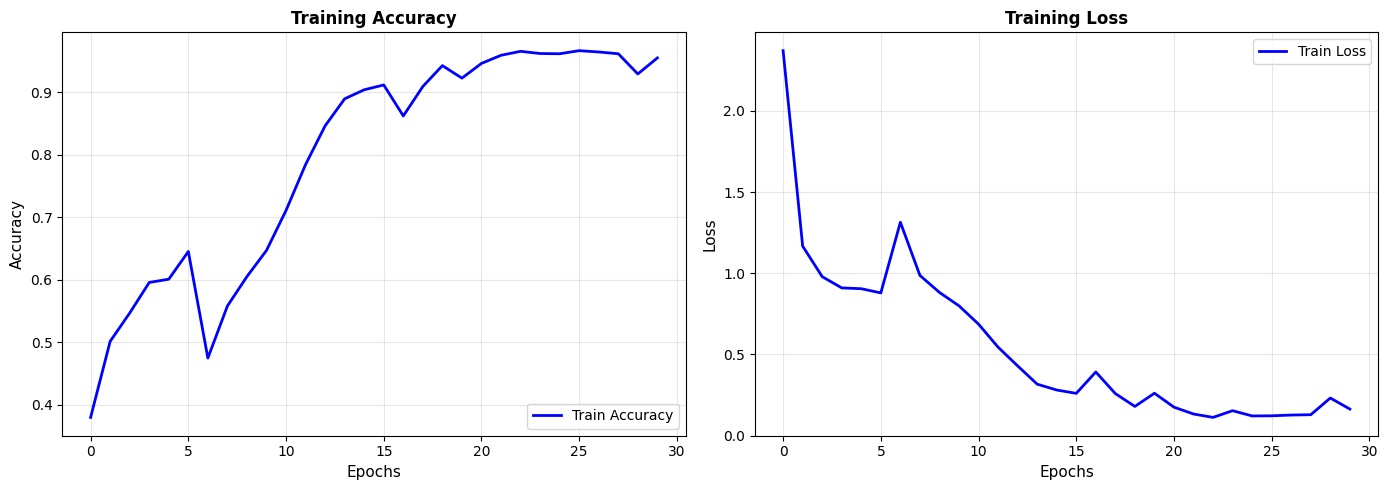

In [16]:
import matplotlib.pyplot as plt

def plot_hist(hist):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Plot Training Accuracy
    axes[0].plot(hist.history["accuracy"], linewidth=2, color='blue', label="Train Accuracy")
    # Uncomment if you have validation data
    # if "val_accuracy" in hist.history:
    #     axes[0].plot(hist.history["val_accuracy"], linewidth=2, color='orange', label="Val Accuracy")
    
    axes[0].set_xlabel('Epochs', fontsize=11)
    axes[0].set_ylabel('Accuracy', fontsize=11)
    axes[0].set_title('Training Accuracy', fontsize=12, fontweight='bold')
    axes[0].legend(loc='lower right', fontsize=10)
    axes[0].grid(True, alpha=0.3)
    
    # Plot Training Loss
    axes[1].plot(hist.history["loss"], linewidth=2, color='blue', label="Train Loss")
    # Uncomment if you have validation data
    # if "val_loss" in hist.history:
    #     axes[1].plot(hist.history["val_loss"], linewidth=2, color='orange', label="Val Loss")
    
    axes[1].set_xlabel('Epochs', fontsize=11)
    axes[1].set_ylabel('Loss', fontsize=11)
    axes[1].set_title('Training Loss', fontsize=12, fontweight='bold')
    axes[1].legend(loc='upper right', fontsize=10)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Call the function
plot_hist(hist)

In [38]:
import numpy as np

# Show training accuracy
print(f"Final Training Accuracy:   {hist.history['accuracy'][-1]*100:.2f}%")
print(f"Final Validation Accuracy: {hist.history['val_accuracy'][-1]*100:.2f}%")

# Make predictions on test data
predictions = model.predict(test_x, verbose=0)
predicted_classes = np.argmax(predictions, axis=1)

print(f"\nPredicted {len(predicted_classes)} test samples")
print(f"Class distribution: {np.bincount(predicted_classes)}")

Final Training Accuracy:   95.47%
Final Validation Accuracy: 59.55%

Predicted 188 test samples
Class distribution: [17 78 61 32]


In [22]:
model.save('Saved_Models/final_leaf_disease_efficientnetb0.h5')
print("Model saved in Keras (.h5) format.")

Model saved in Keras (.h5) format.


In [32]:
model.save('Saved_Models/final_leaf_disease_efficientnetb0.keras')
print("Model saved in Keras (.keras) format.")

Model saved in Keras (.keras) format.


Making predictions on training data...
112/112 [==============================] - 67s 598ms/step
Predictions shape: (3558, 4)
Predicted classes shape: (3558,)

CONFUSION MATRIX
[[319   3  23 563]
 [ 13 302  54 534]
 [  1   7 846  40]
 [  1   1   1 850]]


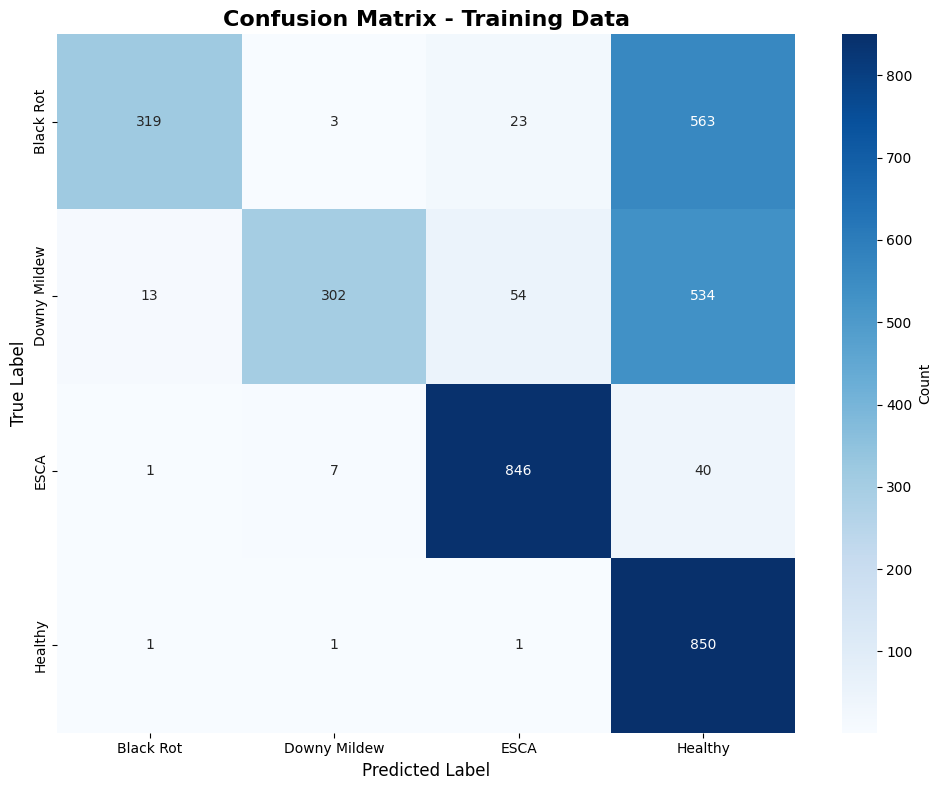

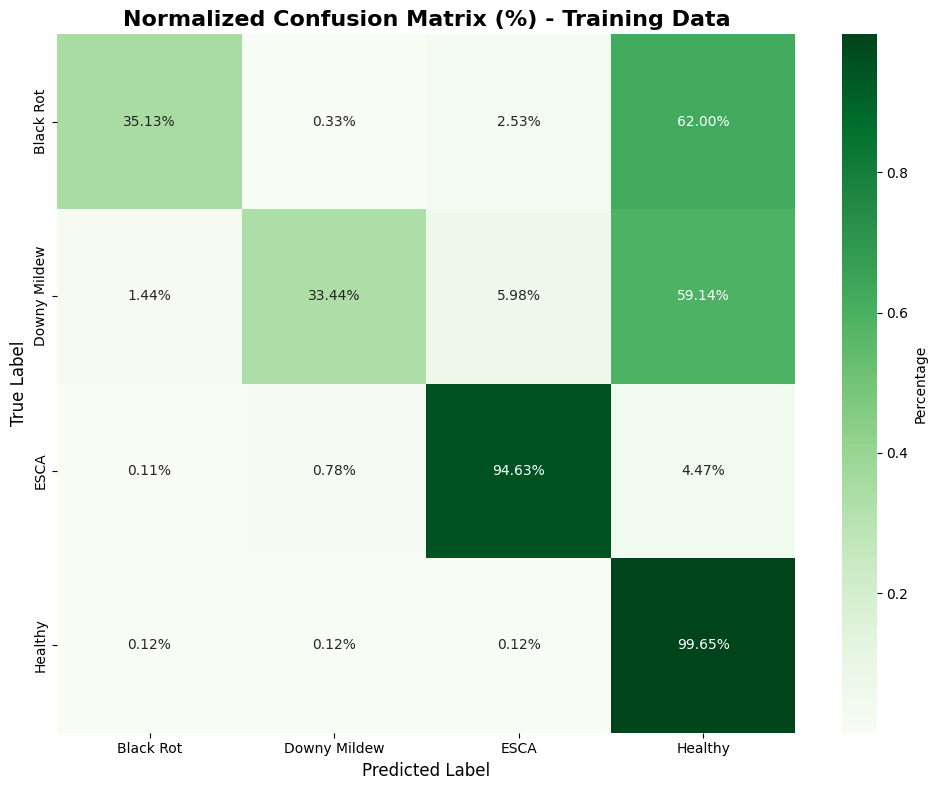


CLASSIFICATION REPORT
              precision    recall  f1-score   support

   Black Rot     0.9551    0.3513    0.5137       908
Downy Mildew     0.9649    0.3344    0.4967       903
        ESCA     0.9156    0.9463    0.9307       894
     Healthy     0.4278    0.9965    0.5986       853

    accuracy                         0.6512      3558
   macro avg     0.8158    0.6571    0.6349      3558
weighted avg     0.8212    0.6512    0.6345      3558


OVERALL METRICS
Accuracy:  0.6512
Precision: 0.8212
Recall:    0.6512
F1-Score:  0.6345

PER-CLASS ACCURACY
Black Rot      : 0.3513 (319/908)
Downy Mildew   : 0.3344 (302/903)
ESCA           : 0.9463 (846/894)
Healthy        : 0.9965 (850/853)

✓ Evaluation complete!


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# ---------------------------
# Make Predictions on Training Data
# ---------------------------
print("Making predictions on training data...")
train_predictions = model.predict(train_x)
train_pred_classes = np.argmax(train_predictions, axis=1)

print(f"Predictions shape: {train_predictions.shape}")
print(f"Predicted classes shape: {train_pred_classes.shape}")

# ---------------------------
# Confusion Matrix
# ---------------------------
# Define your class names (update these based on your actual classes)
class_names = ['Black Rot', 'Downy Mildew', 'ESCA', 'Healthy']  # UPDATE THIS!

cm = confusion_matrix(train_y, train_pred_classes)

print("\n" + "="*50)
print("CONFUSION MATRIX")
print("="*50)
print(cm)

# ---------------------------
# Plot Confusion Matrix
# ---------------------------
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Training Data', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# ---------------------------
# Normalized Confusion Matrix (Percentages)
# ---------------------------
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Greens', 
            xticklabels=class_names, 
            yticklabels=class_names,
            cbar_kws={'label': 'Percentage'})
plt.title('Normalized Confusion Matrix (%) - Training Data', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# ---------------------------
# Classification Report
# ---------------------------
print("\n" + "="*50)
print("CLASSIFICATION REPORT")
print("="*50)
print(classification_report(train_y, train_pred_classes, 
                          target_names=class_names, 
                          digits=4))

# ---------------------------
# Overall Metrics
# ---------------------------
print("\n" + "="*50)
print("OVERALL METRICS")
print("="*50)
print(f"Accuracy:  {accuracy_score(train_y, train_pred_classes):.4f}")
print(f"Precision: {precision_score(train_y, train_pred_classes, average='weighted'):.4f}")
print(f"Recall:    {recall_score(train_y, train_pred_classes, average='weighted'):.4f}")
print(f"F1-Score:  {f1_score(train_y, train_pred_classes, average='weighted'):.4f}")

# ---------------------------
# Per-Class Accuracy
# ---------------------------
print("\n" + "="*50)
print("PER-CLASS ACCURACY")
print("="*50)
for i, class_name in enumerate(class_names):
    class_correct = cm[i, i]
    class_total = cm[i, :].sum()
    class_accuracy = class_correct / class_total if class_total > 0 else 0
    print(f"{class_name:15s}: {class_accuracy:.4f} ({class_correct}/{class_total})")

# ---------------------------
# IF YOU HAVE TEST DATA, USE THIS:
# ---------------------------
# Uncomment and use if you have separate test_x and test_y data
"""
print("\n" + "="*50)
print("EVALUATING ON TEST DATA")
print("="*50)

test_predictions = model.predict(test_x)
test_pred_classes = np.argmax(test_predictions, axis=1)

# Convert test_y if needed (same as train_y conversion)
if hasattr(test_y, 'toarray'):
    test_y = test_y.toarray()
if len(test_y.shape) > 1 and test_y.shape[1] > 1:
    test_y = np.argmax(test_y, axis=1)
elif len(test_y.shape) > 1 and test_y.shape[1] == 1:
    test_y = test_y.flatten()

cm_test = confusion_matrix(test_y, test_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.title('Confusion Matrix - Test Data', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

print("\nTest Set Classification Report:")
print(classification_report(test_y, test_pred_classes, 
                          target_names=class_names, 
                          digits=4))

print(f"\nTest Accuracy: {accuracy_score(test_y, test_pred_classes):.4f}")
"""

print("\n✓ Evaluation complete!")

In [ ]:
# CPU completed the training in 7 min 53 Seconds and GPU did that training in 25.6 seconds